In [1]:
import pandas as pd

In [2]:
mlp_responses_path = "../runs/trades_ppo_model_mlp_policy_0.0001_0.95_0.2.csv"
transformer_responses_path = "../runs/trades_ppo_model_mlp_policy_0.0003_0.97_0.2.csv"
blotter_responses_path = "../runs/trades_with_blotter.csv"

mlp_res = pd.read_csv(mlp_responses_path)
trans_res = pd.read_csv(transformer_responses_path)
blotter_res = pd.read_csv(blotter_responses_path)

In [3]:
mlp_res.shape, trans_res.shape, blotter_res.shape

((39773, 9), (40685, 9), (33164, 10))

In [4]:
mlp_res.head()

,step,timestamp,action,price,shares,reward,transaction_cost,slippage,time_penalty
0,6,2023-07-03 08:00:30.451005195,1,194.02,129.0,-0.237044,0.080316,0.14,0.016728
1,7,2023-07-03 08:00:30.451005195,1,194.01,198.0,-0.192126,0.025398,0.15,0.016728
2,10,2023-07-03 08:00:30.451829005,2,194.00,101.0,-0.227494,0.050796,0.16,0.016698
3,12,2023-07-03 08:00:30.451829005,2,194.00,226.0,-0.062007,0.025398,0.02,0.016609
4,18,2023-07-03 08:00:57.325590403,1,194.10,197.0,-0.062007,0.025398,0.02,0.016609


In [5]:
import matplotlib.pyplot as plt

In [6]:
print("MLP Model Stats :")
print(f"Total Reward on  : {sum(mlp_res['reward'])}")
print(f"Total Slippage on  : {sum(mlp_res['slippage'])}")
print(f"Total time penalty on  : {sum(mlp_res['time_penalty'])}")

MLP Model Stats :
Total Reward on  : -8643.514695735152
Total Slippage on  : 353.23999999991327
Total time penalty on  : 684.1642161000135


In [23]:
print("Transformer Model Stats :")
print(f"Total Reward on  : {sum(trans_res['reward'])}")
print(f"Total Slippage on  : {sum(trans_res['slippage'])}")
print(f"Total time penalty on  : {sum(trans_res['time_penalty'])}")

Transformer Model Stats :
Total Reward on  : -8862.145992055735
Total Slippage on  : 356.8049999999085
Total time penalty on  : 700.5806519000113


In [7]:
print("Blotter Model Stats :")
print(f"Total Reward on  : {sum(blotter_res['reward'])}")
print(f"Total Slippage on  : {sum(blotter_res['slippage'])}")
print(f"Total time penalty on  : {sum(blotter_res['time_penalty'])}")

Blotter Model Stats :
Total Reward on  : -12231.775689639546
Total Slippage on  : 287.39999999997303
Total time penalty on  : 5625.276848999933


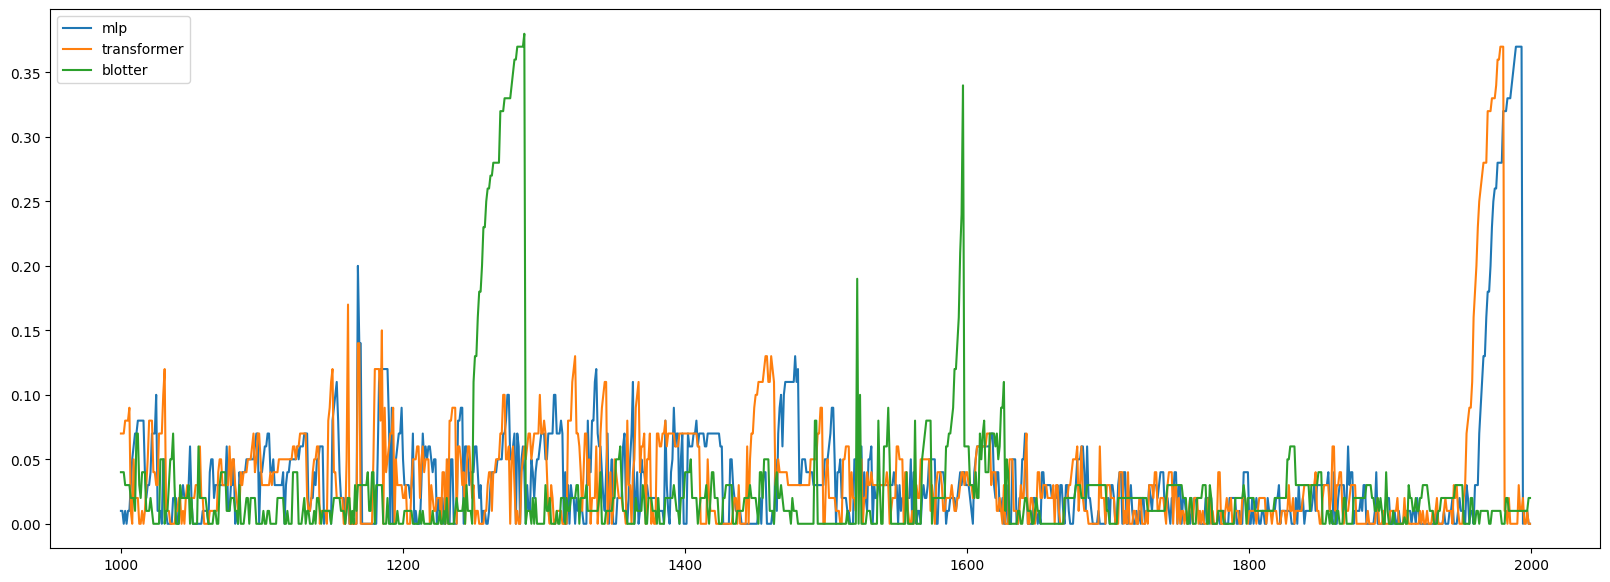

In [8]:
# Checking on a random window

plt.figure(figsize=(20, 7))
plt.plot(mlp_res["slippage"][1000:2000], label='mlp')
plt.plot(trans_res["slippage"][1000:2000], label='transformer')
plt.plot(blotter_res["slippage"][1000:2000], label='blotter')
plt.legend()
plt.show()

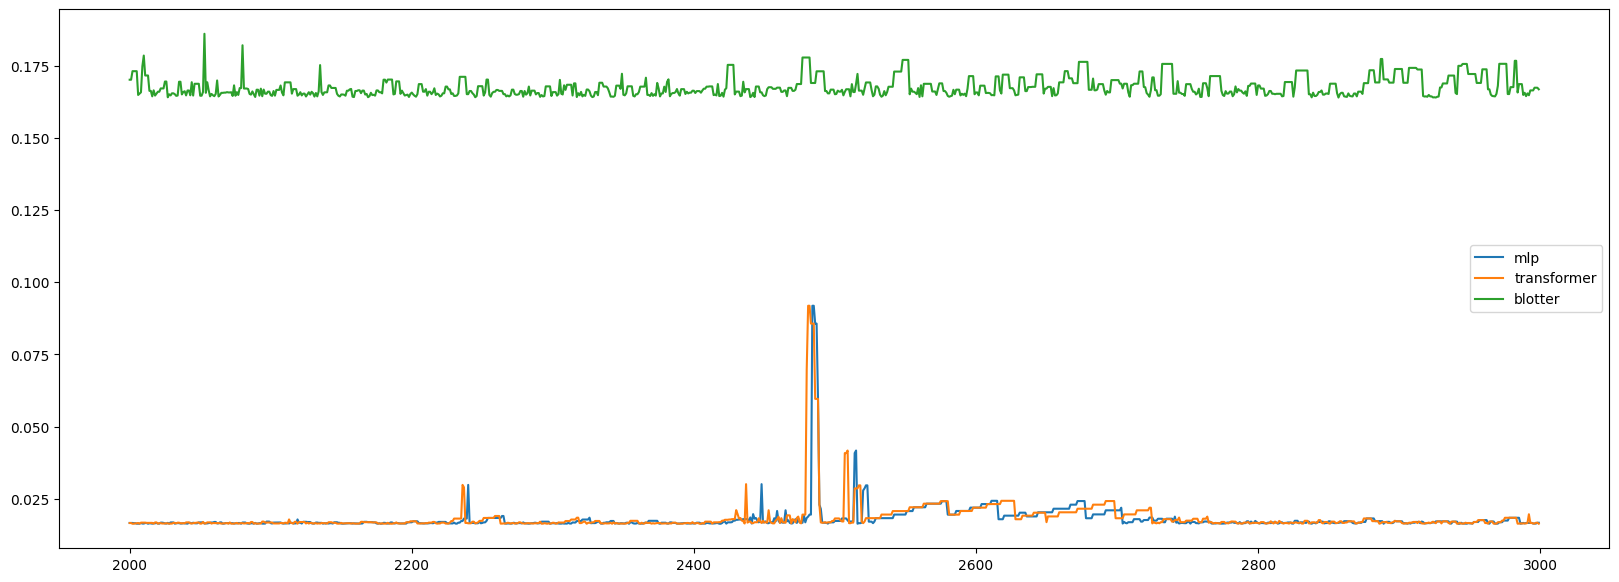

In [10]:
# Checking on a random window

plt.figure(figsize=(20, 7))
plt.plot(mlp_res["time_penalty"][2000:3000], label='mlp')
plt.plot(trans_res["time_penalty"][2000:3000], label='transformer')
plt.plot(blotter_res["time_penalty"][2000:3000], label='blotter')
plt.legend()
plt.show()

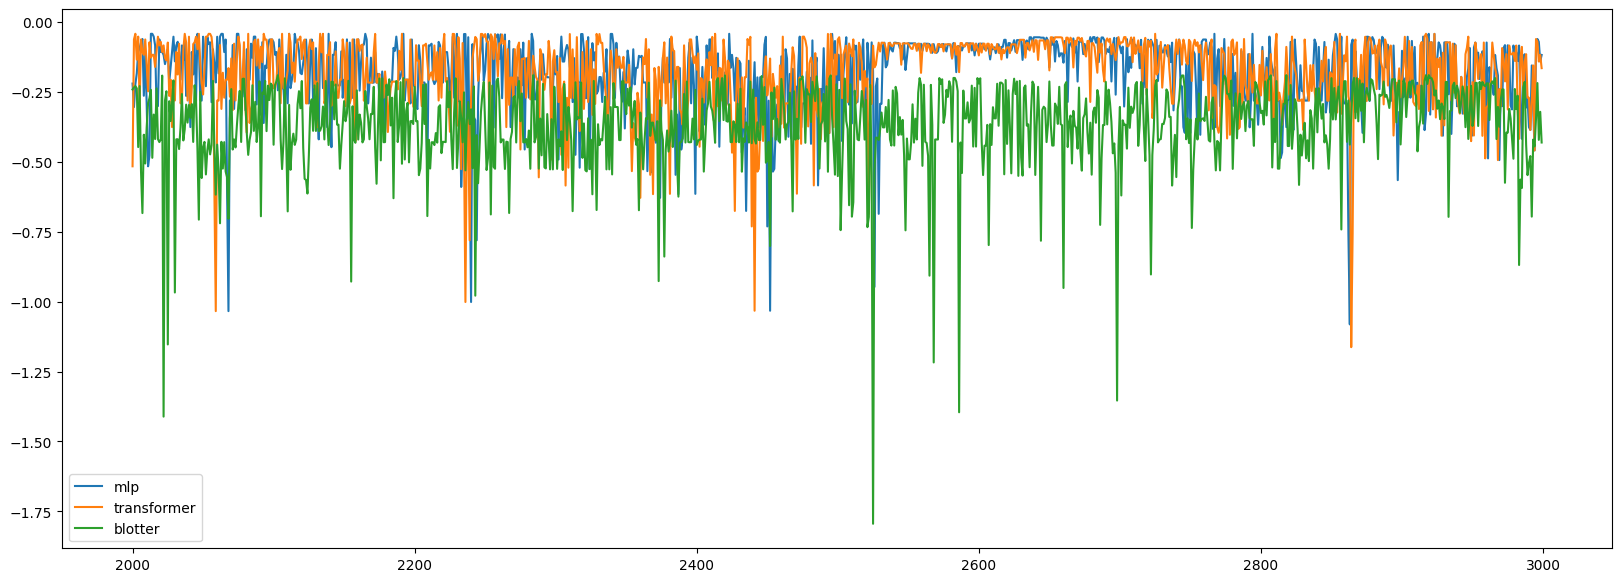

In [11]:
# Checking on a random window

plt.figure(figsize=(20, 7))
plt.plot(mlp_res["reward"][2000:3000], label='mlp')
plt.plot(trans_res["reward"][2000:3000], label='transformer')
plt.plot(blotter_res["reward"][2000:3000], label='blotter')
plt.legend()
plt.show()

In [13]:
mlp_res.groupby('action').sum()[['reward', 'slippage', 'time_penalty']]

,reward,slippage,time_penalty
action,,,
1,-4344.139400,179.61,343.045060
2,-4299.375296,173.63,341.119156


In [14]:
trans_res.groupby('action').sum()[['reward', 'slippage', 'time_penalty']]

,reward,slippage,time_penalty
action,,,
1,-4455.628475,183.295,351.271623
2,-4406.517517,173.510,349.309029


In [15]:
blotter_res.groupby('action').sum()[['reward', 'slippage', 'time_penalty']]

,reward,slippage,time_penalty
action,,,
BUY,-6343.138576,224.35,2994.244408
SELL,-5888.637113,63.05,2631.032441
